In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


# medical = pd.read_csv('../documents/KaggleV2-May-2016.csv',parse_dates=['ScheduledDay','AppointmentDay'])
# File needs to be in the same root folder
medical = pd.read_csv('healthcare-dataset-stroke-data.csv')
medical.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [89]:
# medical['ever_married'].value_counts()
medical['ever_married'] = medical['ever_married'].map({'Yes':1,'No':0})

In [90]:
le = LabelEncoder()
medical['gender'] = le.fit_transform(medical['gender'])
medical['work_type'] = le.fit_transform(medical['work_type'])
medical['Residence_type'] = le.fit_transform(medical['Residence_type'])
medical['smoking_status'] = le.fit_transform(medical['smoking_status'])
medical.fillna(0)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.00,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.00,0,0,1,3,0,202.21,0.0,2,1
2,31112,1,80.00,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.00,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.00,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.00,0,0,1,2,1,186.21,29.0,1,1
6,53882,1,74.00,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,69.00,0,0,0,2,1,94.39,22.8,2,1
8,27419,0,59.00,0,0,1,2,0,76.15,0.0,0,1
9,60491,0,78.00,0,0,1,2,1,58.57,24.2,0,1


In [91]:
medical.head()
medical.to_csv('medical.csv', index=False)

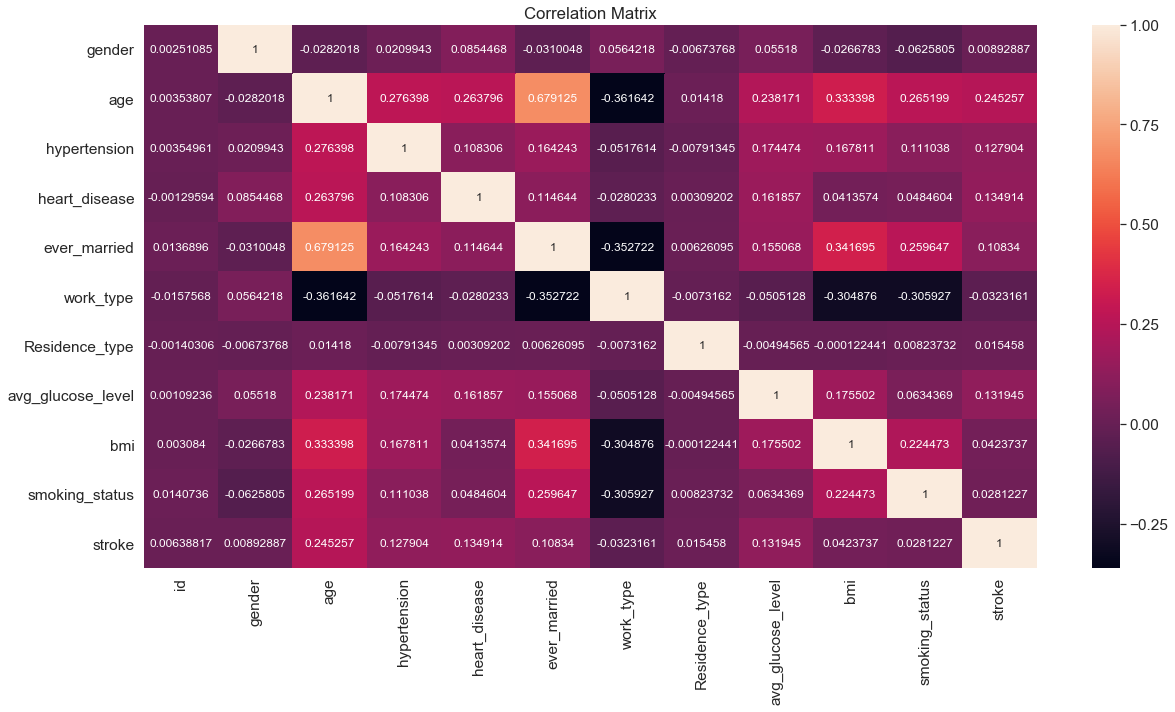

In [92]:
df_cm = medical.corr(method='pearson', min_periods=1)
df_cm = df_cm.drop(['id'])
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},fmt='g') # font size
# plt.figure(figsize=(80, 80))
plt.title("Correlation Matrix")
plt.rcParams["figure.figsize"] = (20,10)

plt.show()


In [94]:
from scipy.stats.stats import pearsonr

target_col_name = 'stroke'
feature_target_corr = {}
feature_target_corrp = {}

for col in df_cm:
    if target_col_name != col:
        feature_target_corr[col] = \
            pearsonr(df_cm[col], df_cm[target_col_name])[0]
        feature_target_corrp[col + '_' + target_col_name] = \
            pearsonr(df_cm[col], df_cm[target_col_name])
print("Feature-Target Correlations")
# correlation coefficient
print(feature_target_corr)
# pvalue
print(feature_target_corrp)
print(type(feature_target_corr))

Feature-Target Correlations
{'id': 0.23179362568132045, 'gender': -0.17456715856481997, 'age': 0.21332624186957005, 'hypertension': 0.05700686491716775, 'heart_disease': 0.08364921241093792, 'ever_married': 0.06790393225338534, 'work_type': -0.14438594831707136, 'Residence_type': -0.15423057302069357, 'avg_glucose_level': 0.0600827469282908, 'bmi': -0.06229357308067101, 'smoking_status': -0.07730194934222252}
{'id_stroke': (0.23179362568132045, 0.4928265430099702), 'gender_stroke': (-0.17456715856481997, 0.6076940461549829), 'age_stroke': (0.21332624186957005, 0.5288158586112677), 'hypertension_stroke': (0.05700686491716775, 0.867778064342934), 'heart_disease_stroke': (0.08364921241093792, 0.8068286340299194), 'ever_married_stroke': (0.06790393225338534, 0.8427529462424579), 'work_type_stroke': (-0.14438594831707136, 0.6718884352782131), 'Residence_type_stroke': (-0.15423057302069357, 0.6507077166226318), 'avg_glucose_level_stroke': (0.0600827469282908, 0.860702327162922), 'bmi_stroke'

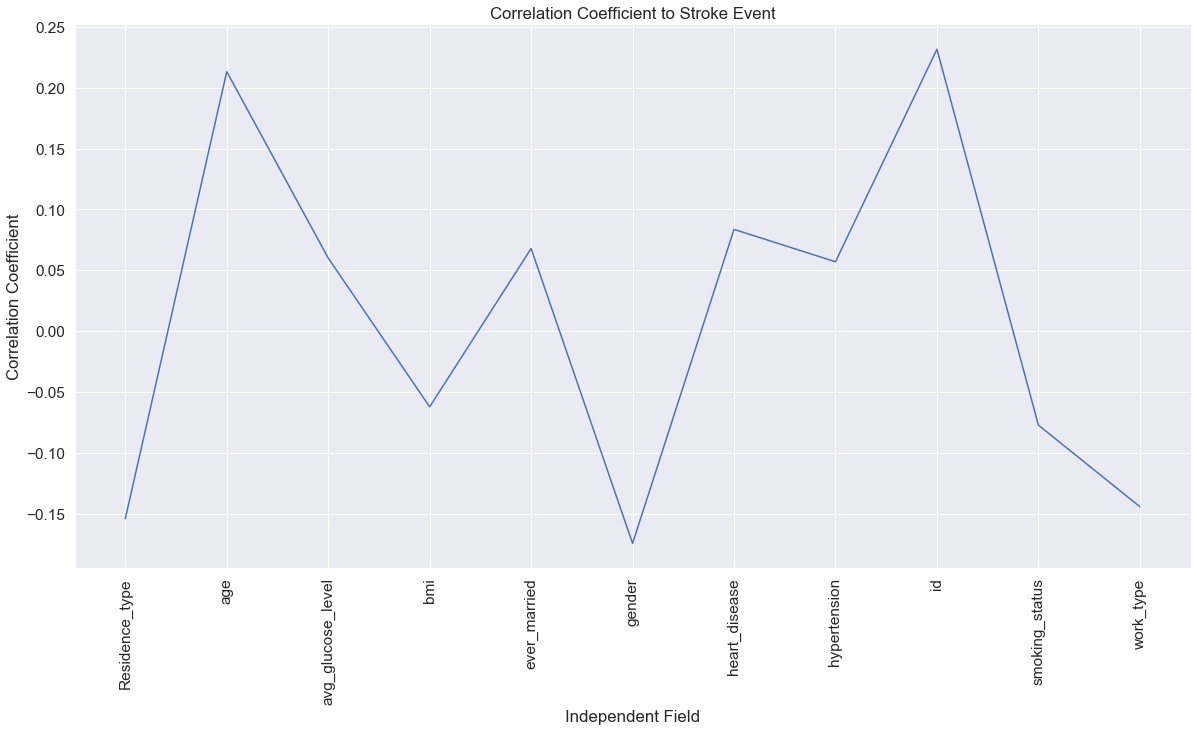

In [96]:
myList = feature_target_corr.items()
myList = sorted(myList) 
x, y = zip(*myList) 
plt.xticks(rotation='vertical')
plt.title("Correlation Coefficient to Stroke Event")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Independent Field")

plt.plot(x, y)
plt.show()

In [97]:
sc = StandardScaler()
medical =medical[~medical.isin([np.nan, np.inf, -np.inf]).any(1)]

scaledData = pd.DataFrame(sc.fit_transform(medical.drop(['id', 'stroke'],axis=1)),columns=medical.drop(['id', 'stroke'],axis=1).columns)

x = scaledData
y = medical['stroke']


C:\Users\Allan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Allan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


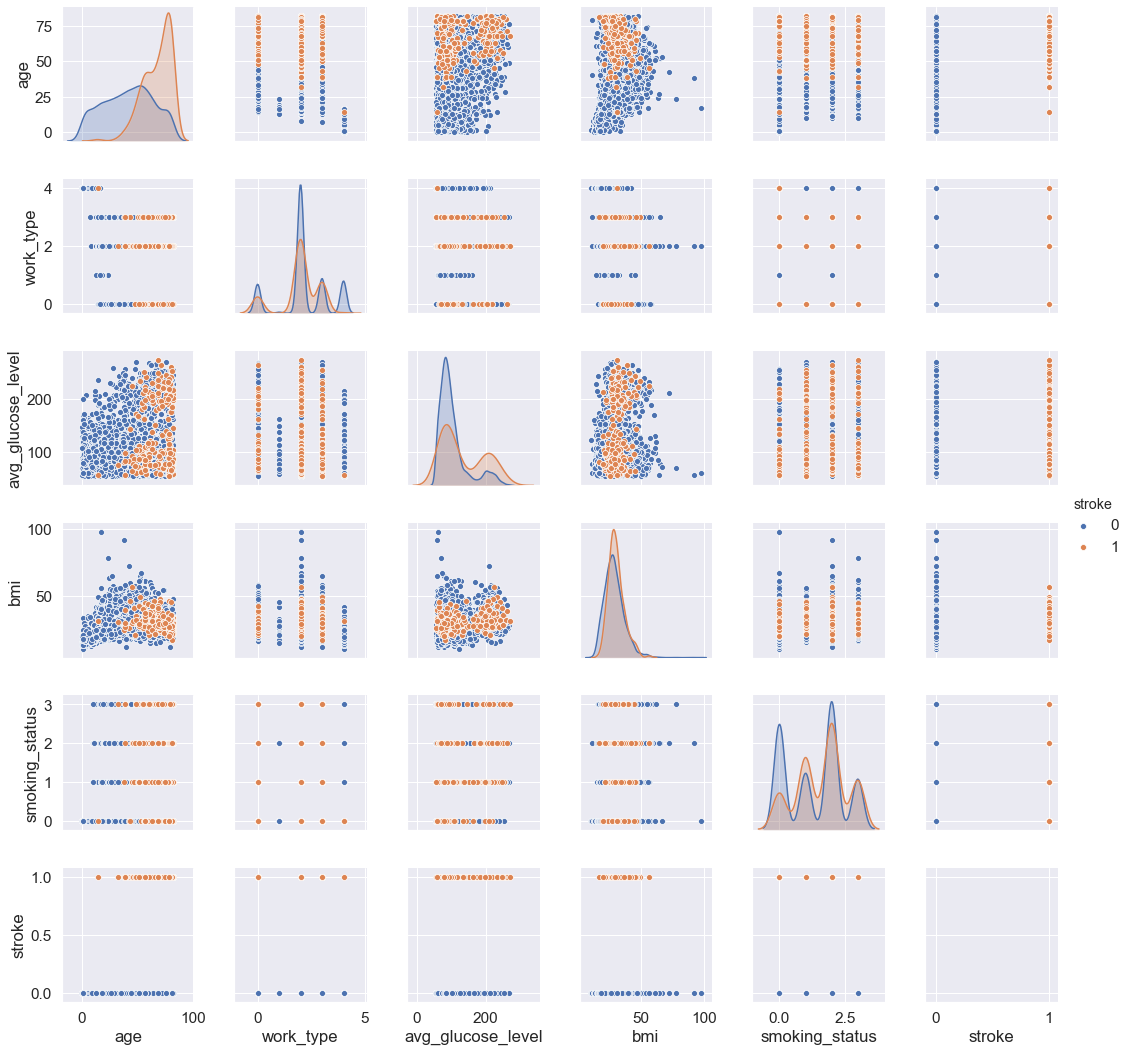

In [98]:
df =pd.DataFrame(medical.drop(['id', 'gender', 'ever_married', 'heart_disease', 'Residence_type' ,'hypertension'],axis=1))
# medical.columns
sns.pairplot(df, hue="stroke")

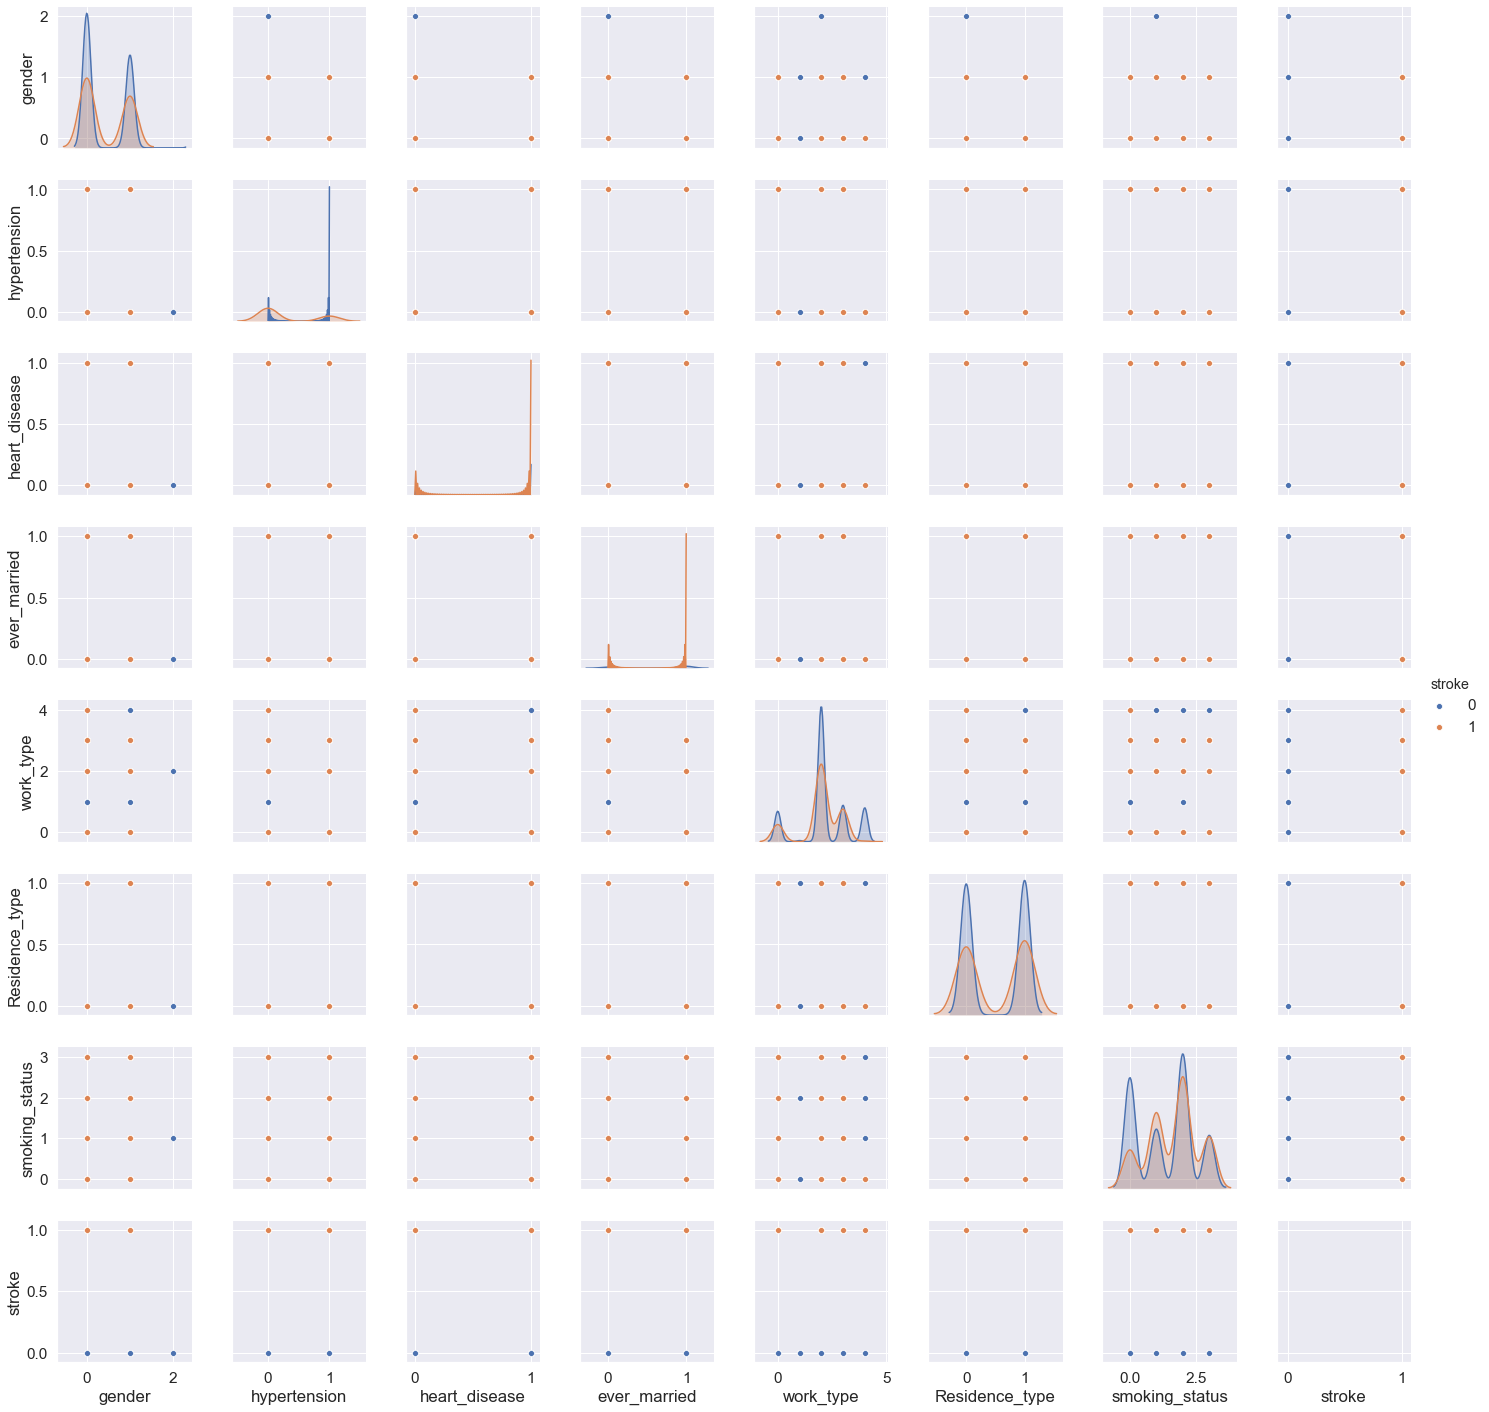

In [99]:
df =pd.DataFrame(medical.drop(['id', 'avg_glucose_level', 'bmi', 'age'],axis=1))
# medical.columns
sns.pairplot(df, hue="stroke")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F420A8710>,
      dtype=object)

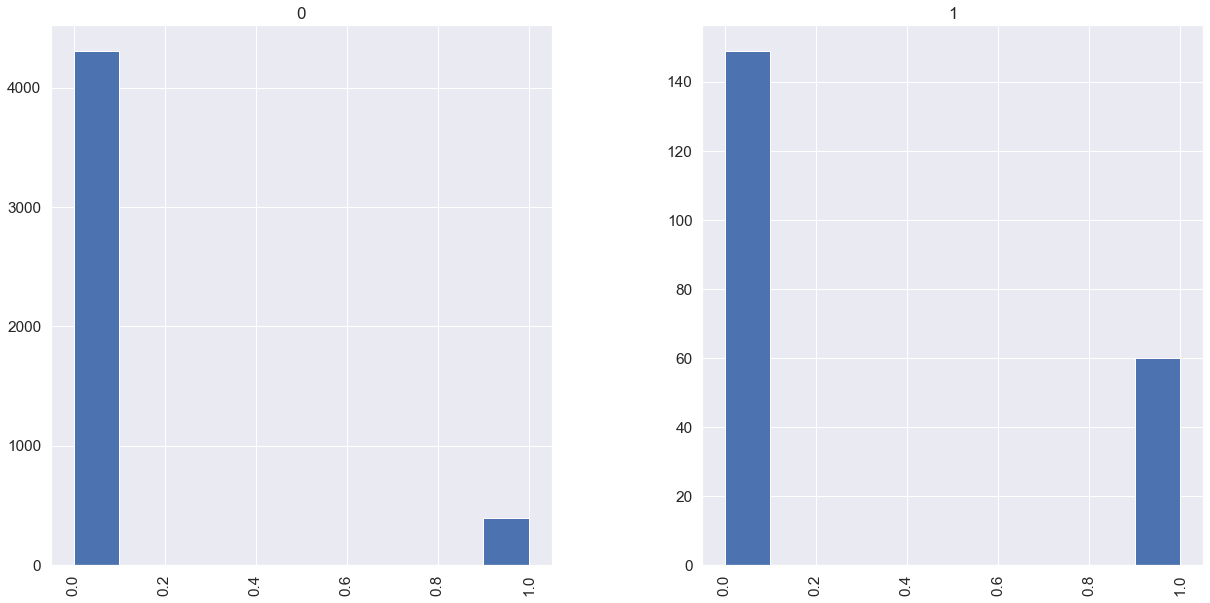

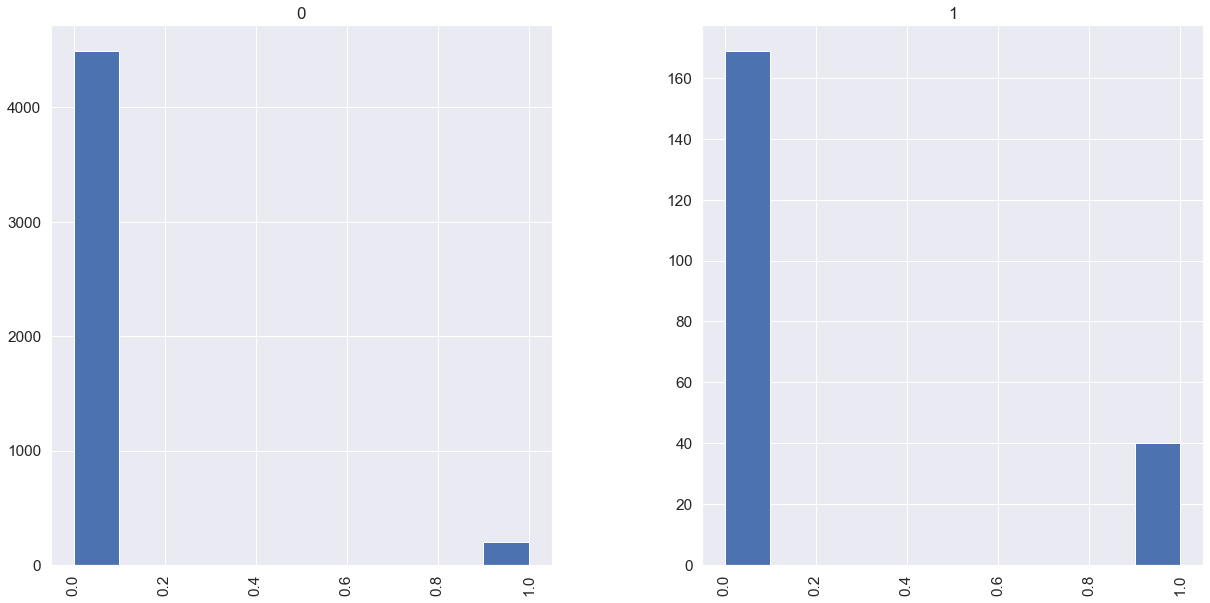

In [100]:
medical.columns
medical['hypertension'].hist(by=medical['stroke'])
medical['heart_disease'].hist(by=medical['stroke'])

# medical['stroke'].hist(by=medical['Residence_type'])

In [101]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .20 ,random_state=32)


In [102]:
# print (ytrain)
# print(type(xtrain))
# ytrain.isna()
# xtrain.fillna(0)
# ytrain.fillna(0)

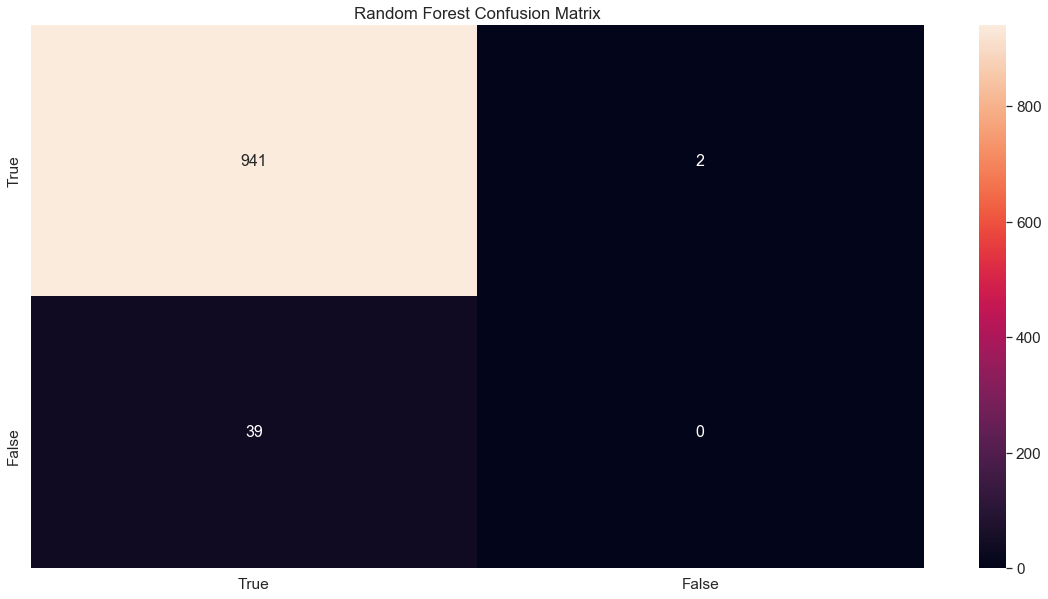


*** Random Forest *** 

accuracy_score 
 0.9582484725050916
confusion_matrix 
 [[941   2]
 [ 39   0]]
classification_report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       943
           1       0.00      0.00      0.00        39

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [103]:

#Packages used for random and decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Calling the random forest function from SciKit and fitting our datasets our datasets into the model
model = RandomForestClassifier()
rForest= model.fit(xtrain, ytrain)

#Our Predictions from the model
ypred = rForest.predict(xtest)
df_cm =pd.DataFrame(confusion_matrix(ytest,ypred), ['True', 'False'], ['True', 'False'])
# plt.figure(figsize=(10,7))
plt.title("Random Forest Confusion Matrix")
plt.rcParams["figure.figsize"] = (20,10)

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

#Model Performance
print('\n***','Random Forest','*** \n')
print('accuracy_score \n',accuracy_score(ytest,ypred))
print('confusion_matrix \n',confusion_matrix(ytest,ypred))
print('classification_report \n',classification_report(ytest,ypred))



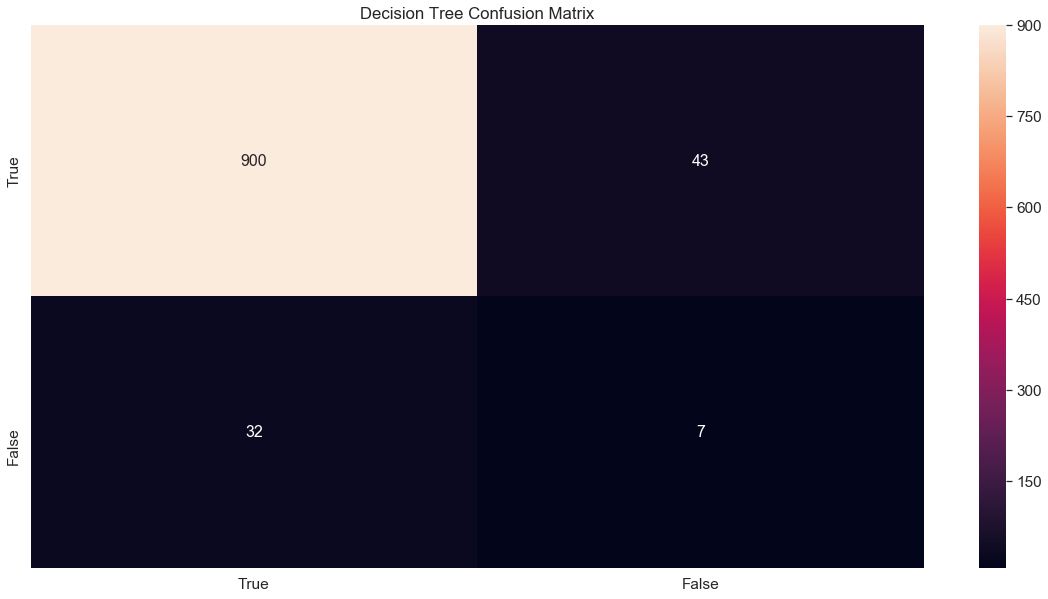


*** Decision Tree *** 

accuracy_score 
 0.9236252545824847
confusion_matrix 
 [[900  43]
 [ 32   7]]
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       943
           1       0.14      0.18      0.16        39

    accuracy                           0.92       982
   macro avg       0.55      0.57      0.56       982
weighted avg       0.93      0.92      0.93       982



In [104]:

#Calling the decision tree function from SciKit and fitting our datasets into the model
model = DecisionTreeClassifier()
dTree= model.fit(xtrain, ytrain)

#Our Predictions from the model
ypred = dTree.predict(xtest)
df_cm =pd.DataFrame(confusion_matrix(ytest,ypred), ['True', 'False'], ['True', 'False'])
# plt.figure(figsize=(10,7))
plt.title("Decision Tree Confusion Matrix")
plt.rcParams["figure.figsize"] = (20,10)

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

#Model Performance
print('\n***','Decision Tree','*** \n')
print('accuracy_score \n',accuracy_score(ytest,ypred))
print('confusion_matrix \n',confusion_matrix(ytest,ypred))
print('classification_report \n',classification_report(ytest,ypred))




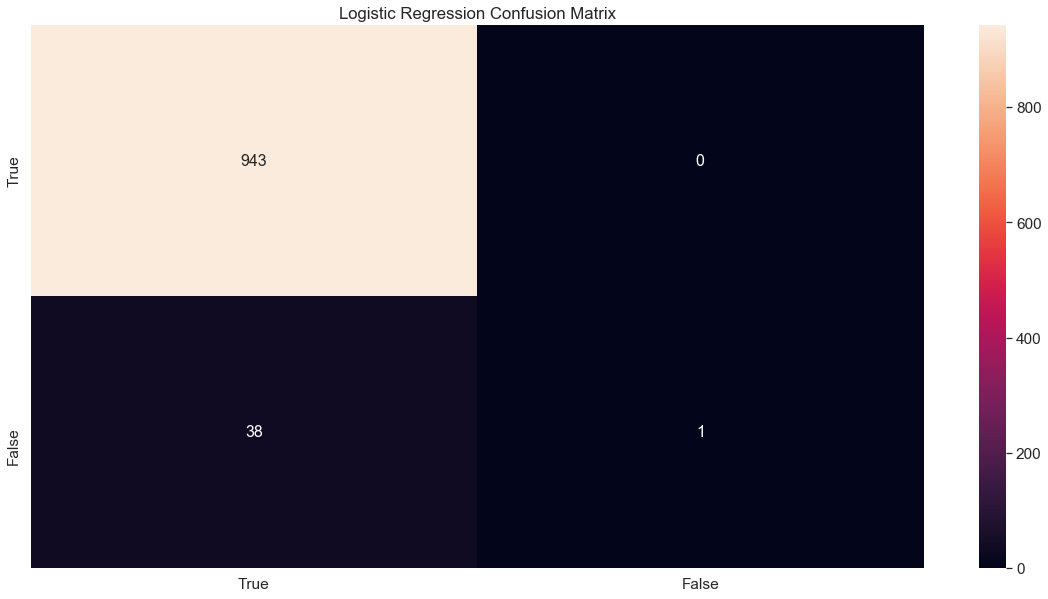


*** Logistic Regression *** 

accuracy_score 
 0.9613034623217923
confusion_matrix 
 [[943   0]
 [ 38   1]]
classification_report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       943
           1       1.00      0.03      0.05        39

    accuracy                           0.96       982
   macro avg       0.98      0.51      0.52       982
weighted avg       0.96      0.96      0.94       982



In [105]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(xtrain,ytrain)


ypred=logreg.predict(xtest)
df_cm =pd.DataFrame(confusion_matrix(ytest,ypred), ['True', 'False'], ['True', 'False'])
# plt.figure(figsize=(10,7))
plt.title("Logistic Regression Confusion Matrix")
plt.rcParams["figure.figsize"] = (20,10)

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

#Model Performance
print('\n***','Logistic Regression','*** \n')
print('accuracy_score \n',accuracy_score(ytest,ypred))
print('confusion_matrix \n',confusion_matrix(ytest,ypred))
print('classification_report \n',classification_report(ytest,ypred))

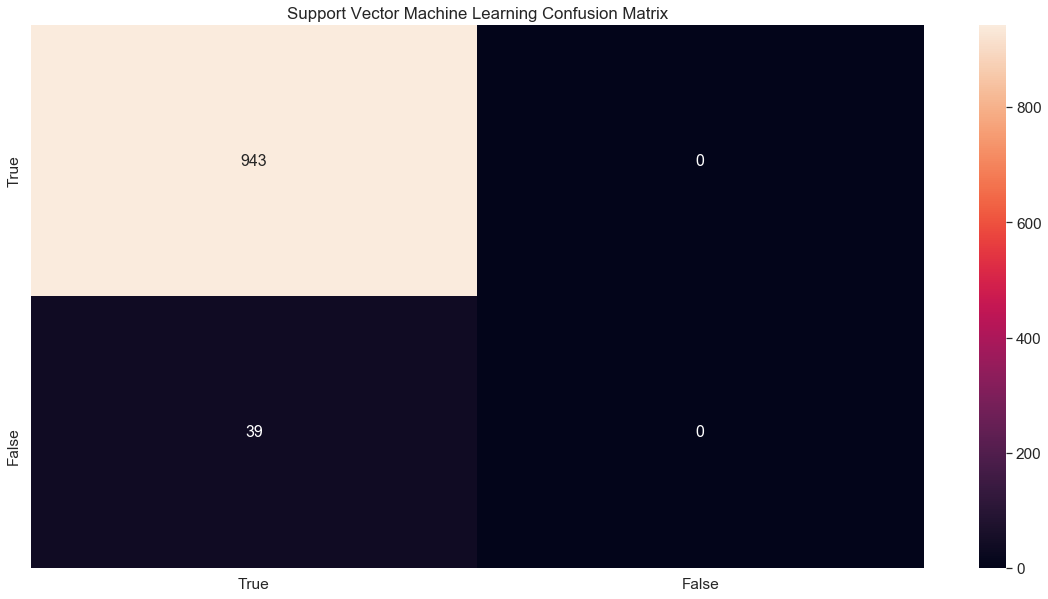


*** Support Vector Machine Learning *** 

accuracy_score 
 0.960285132382892
confusion_matrix 
 [[943   0]
 [ 39   0]]
classification_report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       943
           1       0.00      0.00      0.00        39

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



C:\Users\Allan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
#Packages used for Support Vectors
from sklearn import svm

#Process time is slow for Support Vector models
model = svm.SVC(kernel='linear')

#Fitting our data
sVector= model.fit(xtrain, ytrain)

#Our Predictions from the model
ypred = sVector.predict(xtest)
df_cm =pd.DataFrame(confusion_matrix(ytest,ypred), ['True', 'False'], ['True', 'False'])
# plt.figure(figsize=(10,7))
plt.title("Support Vector Machine Learning Confusion Matrix")
plt.rcParams["figure.figsize"] = (20,10)

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

#Model Performance
print('\n***','Support Vector Machine Learning','*** \n')
print('accuracy_score \n',accuracy_score(ytest,ypred))
print('confusion_matrix \n',confusion_matrix(ytest,ypred))
print('classification_report \n',classification_report(ytest,ypred))



Text(45.248547875, 0.5, 'stroke')

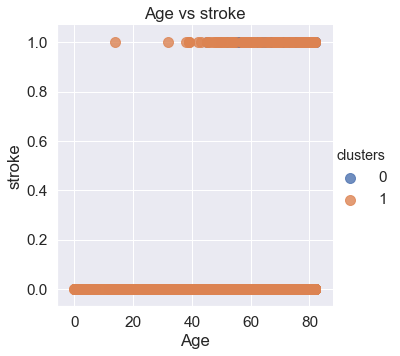

In [107]:
#Package used for Kmeans learning
from sklearn.cluster import KMeans

df = medical.drop(['id'], axis=1)
df.head()

#Sorting into two clusters across ENTIRE dataset
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
labels = kmeans.labels_

#kMean labels are added to our dataframe
df['clusters'] = labels


#Scatter plot of only clusters Age Vs No-Show using seaborn packages
sns.lmplot('age', 'stroke', 
           data=df, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Age vs stroke')
plt.xlabel('Age')
plt.ylabel('stroke')

